In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [21]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/gurpreet0610/sign_language_CNN/master/sign-language-mnist/sign_mnist_test.csv\
    -O /content/sign_mnist_test.csv
#uploaded=files.upload()

--2020-06-05 08:18:07--  https://raw.githubusercontent.com/gurpreet0610/sign_language_CNN/master/sign-language-mnist/sign_mnist_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21777485 (21M) [text/plain]
Saving to: ‘/content/sign_mnist_test.csv’

/content/sign_mnist 100%[===================>]  20.77M  38.0MB/s    in 0.5s    

2020-06-05 08:18:08 (38.0 MB/s) - ‘/content/sign_mnist_test.csv’ saved [21777485/21777485]



In [2]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      csv_reader=csv.reader(training_file,delimiter=",")
      first_line=True
      temp_images=[]
      temp_labels=[]
      for row in csv_reader:
        if first_line:
          first_line=False
        else:
          temp_labels.append(row[0])
          image_data=row[1:785]
          image_data_as_array=np.array_split(image_data,28)
          temp_images.append(image_data_as_array)
      images=np.array(temp_images).astype('float')
      labels=np.array(temp_labels).astype("float")
      # Your code starts here
      # Your code ends here
    return images, labels

training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,axis=3)
testing_images = np.expand_dims(testing_images,axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
    )

validation_datagen = ImageDataGenerator(
    rescale=1.0/255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [8]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(
        64,
        (3,3),
        activation=tf.keras.activations.relu,
        input_shape=(28,28,1)
    ),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(
        128,
        (3,3),
        activation=tf.keras.activations.relu
    ),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(26,activation=tf.keras.activations.softmax)
  ])

# Compile Model. 
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

# Train the Model
history = model.fit_generator(
    train_datagen.flow(
        training_images,
        training_labels,
        batch_size=32  
      ),
      steps_per_epoch=len(training_images)/32,
      epochs=15,
      validation_data=validation_datagen.flow(
          training_images,
          training_labels,
          batch_size=32
      ),
      validation_steps=len(testing_images) / 32,
    )

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
#[6.92426086682151, 0.56609035]


Epoch 1/15
858/857 [==============================] - 76s 88ms/step - loss: 2.6139 - accuracy: 0.2002 - val_loss: 1.2354 - val_accuracy: 0.6024
Epoch 2/15
858/857 [==============================] - 80s 94ms/step - loss: 1.6409 - accuracy: 0.4738 - val_loss: 0.7487 - val_accuracy: 0.7528
Epoch 3/15
858/857 [==============================] - 76s 89ms/step - loss: 1.2165 - accuracy: 0.6039 - val_loss: 0.4657 - val_accuracy: 0.8462
Epoch 4/15
858/857 [==============================] - 76s 88ms/step - loss: 0.9974 - accuracy: 0.6679 - val_loss: 0.3806 - val_accuracy: 0.8704
Epoch 5/15
858/857 [==============================] - 76s 89ms/step - loss: 0.8340 - accuracy: 0.7241 - val_loss: 0.3300 - val_accuracy: 0.8829
Epoch 6/15
858/857 [==============================] - 76s 88ms/step - loss: 0.7230 - accuracy: 0.7595 - val_loss: 0.2250 - val_accuracy: 0.9217
Epoch 7/15
858/857 [==============================] - 76s 89ms/step - loss: 0.6421 - accuracy: 0.7877 - val_loss: 0.1621 - val_accuracy:

[154.22303771972656, 0.7707752585411072]

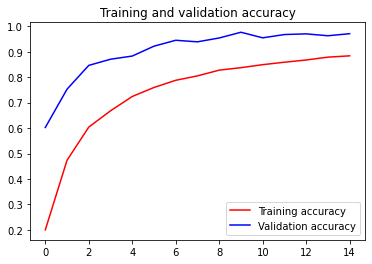

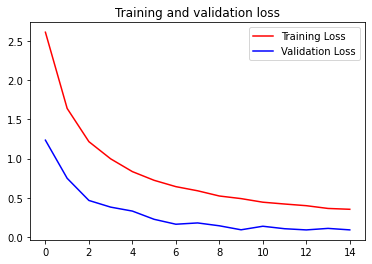

In [10]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()